In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mdates
import plotly.express as px
import plotly.io as pio

plt.rcParams['figure.figsize'] = (10, 5)

df = pd.read_csv("sample_superstore.csv", encoding='latin1')

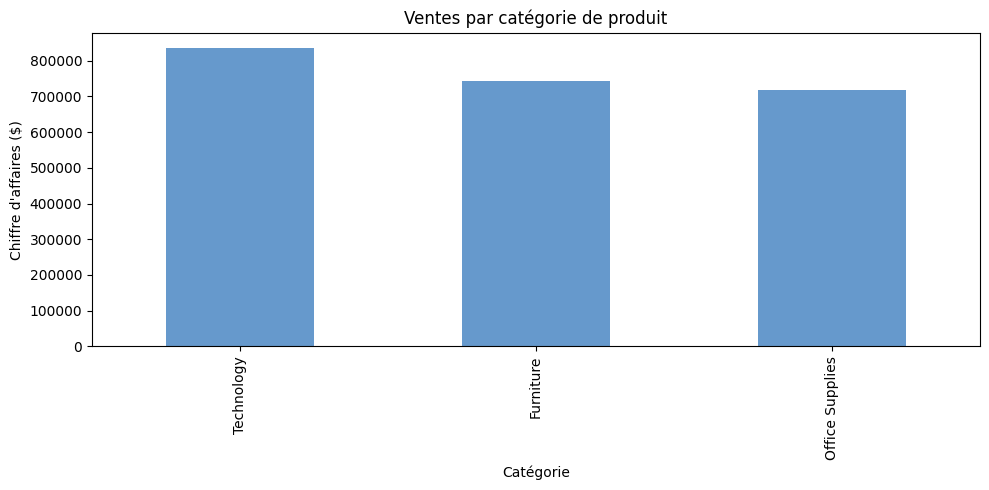

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Suppression des colonnes dupliquées
df.drop_duplicates(inplace=True)

sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

sales_by_category.plot(kind='bar', color='#6699CC')

plt.title("Ventes par catégorie de produit")
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d'affaires ($)")

plt.tight_layout()
plt.show()

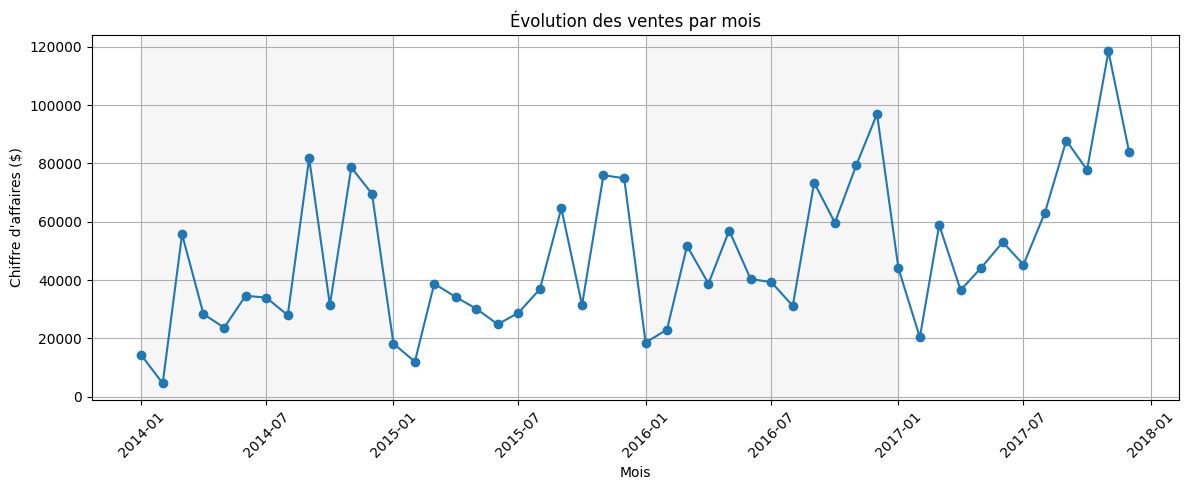

In [ ]:
# Conversion en datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Créer une nouvelle colonne Year-Month
df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)


monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()


monthly_sales['Date'] = pd.to_datetime(monthly_sales['Year-Month'])

fig, ax = plt.subplots(figsize=(12, 5))

# Courbe des ventes
ax.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o')


years = monthly_sales['Date'].dt.year.unique()
for i, year in enumerate(years):
    if i % 2 == 0:
        start = pd.to_datetime(f"{year}-01")
        end = pd.to_datetime(f"{year+1}-01")
        ax.axvspan(start, end, color='lightgrey', alpha=0.2)


ax.set_title("Évolution des ventes par mois")
ax.set_xlabel("Mois")
ax.set_ylabel("Chiffre d'affaires ($)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

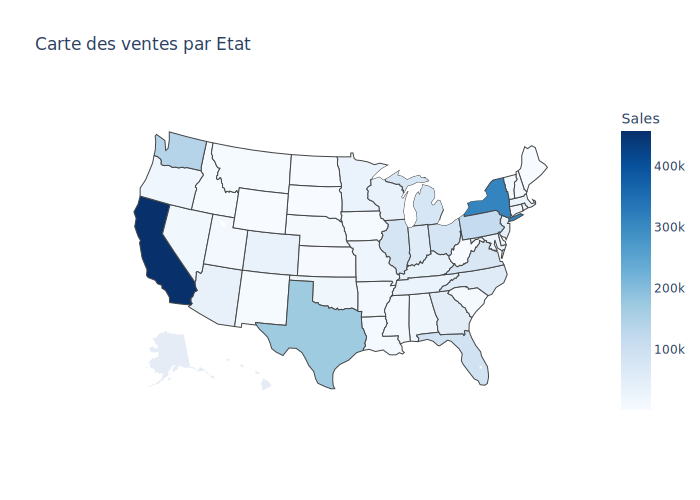

In [ ]:
pio.renderers.default = "svg"

# Agréger les ventes par État
state_sales = df.groupby('State', as_index=False)['Sales'].sum()

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

state_sales['State Code'] = state_sales['State'].map(state_abbrev)


fig = px.choropleth(
    state_sales,
    locations='State Code',
    locationmode='USA-states',  # identifie les États par nom
    color='Sales',
    color_continuous_scale='Blues',
    scope='usa',
    title='Carte des ventes par Etat'
)

fig.show()

Ce mini tableau de bord a été réalisé à partir du dataset e-commerce Sample Superstore, téléchargeable sur Kaggle. (https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download)

Il fournit une vue d’ensemble de l’activité commerciale, basée sur les ventes, le bénéfice et la performance par segment, date et zone géographique.

⸻

🔢 Indicateurs clés

	•	Chiffre d’affaires total : 2,297,201$

	•	Bénéfice total : 286,397$

	•	Taux de profitabilité global : 12.47%

⸻

Ventes par catégorie

Graphique à barres représentant les ventes totales par catégorie de produits (Furniture, Office Supplies, Technology), pour identifier les segments les plus performants.

⸻

Évolution mensuelle des ventes

Une courbe montre la variation des ventes par mois, toutes années confondues.
Un fond alterné par année (gris/blanc) permet une meilleure lecture des tendances saisonnières.

⸻

Carte des ventes par État (USA)

Une carte interactive des États-Unis met en évidence les volumes de vente par État.
Chaque zone est colorée en fonction du chiffre d’affaires cumulé.

⸻

Préparation des données

	•	Nettoyage du jeu de données : suppression des colonnes inutiles, conversion des dates
	•	Agrégation via groupby() pour les KPIs et les visualisations
	•	Visualisations réalisées avec matplotlib, seaborn et plotly.express

⸻